### Contrôle Continu - LU2PY222 : Modélisation Numérique en Physique
#### 5 mars 2025, 10h45 - 12h45

Vous rendrez sur Moodle un **compte-rendu** sous la forme d'un calepin **Jupyter** comprenant :
- vos codes python (bien commentés)
- vos graphiques (axes nommés et courbes légendées lorsque c'est nécessaire)
- les commentaires des résultats sous format Markdown lorsque c'est demandé

Vous avez le droit d'accéder à tous les calepins jupyter présents sur votre Hub, ainsi qu'à vos notes (manuscrites ou numériques) prises pendant les séances de travail de cette UE. L'accès à internet est limité aux sites de documentation **python**, **numpy** et **matplotlib**, et à Moodle. Vos documents numériques doivent être présents dans vos fichiers personnels Moodle. Les clés USB, smartphones et tablettes ne sont pas acceptées.

# Particule dans un cyclotron

Un cyclotron comporte trois parties, voir la figure ci-dessous. Les parties supérieure et inférieure, appelées "D" à cause de la forme de la trajectoire, sont plongées dans un champ magnétique.

![](Figure3.png)

Au temps $t_0=0$ **(ici le temps est sans unité)**, un proton est injecté au niveau du D inférieur sans vitesse. Une tension alternative est appliquée entre les D. Elle crée un champ électrique dont la direction et le sens sont toujours **similaires** à ceux de la vitesse du proton lorsqu’il est entre les D. Les instants $t_n$ où le proton sort des D (soit inférieur, soit supérieur, voir la figure) sont donnés, **sans unité**, par
$$t_n=n+\tau \sqrt{n}.$$
On choisit $\tau=0.5$. Le temps passé par le proton dans un D (supérieur ou inférieur) est toujours de $1$.
La trajectoire du proton est plane. On s’intéresse à sa vitesse. Ses composantes sont données, dans un repère et des unités appropriés, **en fonction de sa position dans le cyclotron:**
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

## Partie I

1. Créer un tableau contenant les instants de sortie des boucles "D" : $t_0$, $t_1$, ... jusqu'à $t_{50}$ inclus. 
2. Vérifier que $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$ avec des opérateurs booléens.
3. Calculer les valeurs de $v_x$ et $v_y$ en fonction du temps pour $t$ variant de $t_2−1$ à $t_2$. Vous utiliserez un échantillonage suffisant pour le temps $t$, dans un tableau distinct de celui de la question précédente. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. 
4. Représenter dans un graphique $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$. Faire de même pour $t$ variant de $t_4-1$ à $t_4$.
5. Déterminer des valeurs approchées des maxima de $v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$, ainsi que les instants $t$ correspondants. Un maximum peut être en bord d'intervalle. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. Commenter.

In [10]:
import numpy as np

In [82]:
# 1

tau = 0.5

def t(n):
    return n + tau * np.sqrt(n)

list_t = []
for i in range(51):
    list_t.append(t(i))

np_t = np.array(list_t)
print(np_t)

[ 0.          1.5         2.70710678  3.8660254   5.          6.11803399
  7.22474487  8.32287566  9.41421356 10.5        11.58113883 12.6583124
 13.73205081 14.80277564 15.87082869 16.93649167 18.         19.06155281
 20.12132034 21.17944947 22.23606798 23.29128785 24.34520788 25.39791576
 26.44948974 27.5        28.54950976 29.59807621 30.64575131 31.6925824
 32.73861279 33.78388218 34.82842712 35.87228132 36.91547595 37.95803989
 39.         40.04138127 41.082207   42.122499   43.16227766 44.20156212
 45.24037035 46.27871926 47.31662479 48.35410197 49.39116499 50.4278273
 51.46410162 52.5        53.53553391]


In [9]:
# 2

print ( np_t[1] == 1.5)
print (np_t[4] == 5)
print (np_t[9] == 10.5)
print (np_t[16] == 18)
print (np_t[25] == 27.5)

True
True
True
True
True


In [48]:
# 3

import matplotlib.pyplot as plt

# t2 - 1 à t2 
n = 1
eps = (-1)**n

debut = np_t[n+1] - 1
fin = np_t[n+1]

temps1 = np.linspace(debut, fin, 10000)

v1_x = eps * np.sqrt(n + 1) * np.sin(np.pi * (temps1 - np_t[n+1]))
v1_y = -eps * np.sqrt(n + 1) * np.cos(np.pi * (temps1 - np_t[n+1]))

# t4 - 1 à t4

temps2 = np.linspace(np_t[4] - 1, np_t[4], 10000)

v2_x = (-1) * np.sqrt(3 + 1) * np.sin(np.pi * (temps2 - np_t[4]))
v2_y =  np.sqrt(3 + 1) * np.cos(np.pi * (temps2 - np_t[4]))


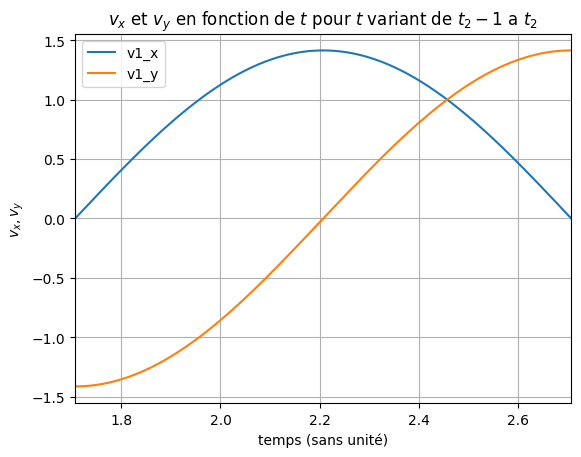

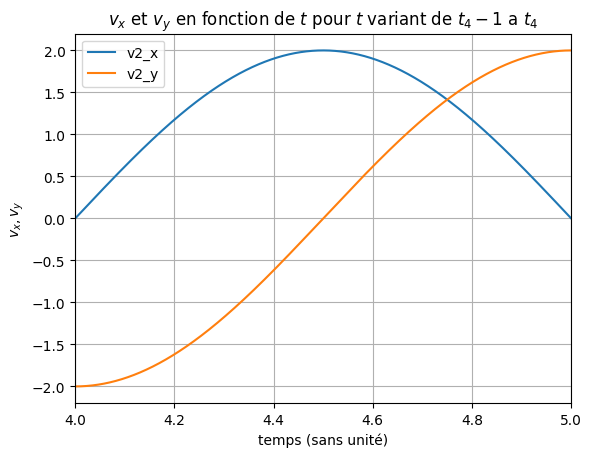

In [49]:
# 4

plt.plot(temps1, v1_x, label = 'v1_x')
plt.plot(temps1, v1_y, label = 'v1_y')
plt.xlim(np_t[2]-1, np_t[2])
plt.xlabel("temps (sans unité)")
plt.ylabel("$v_x, v_y$")
plt.title("$v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$")
plt.grid()
plt.legend()
plt.show()

plt.plot(temps2, v2_x, label = 'v2_x')
plt.plot(temps2, v2_y, label = 'v2_y')
plt.xlim(np_t[4]-1, np_t[4])
plt.xlabel("temps (sans unité)")
plt.ylabel("$v_x, v_y$")
plt.title("$v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_4-1$ a $t_4$")
plt.grid()
plt.legend()
plt.show()


Q5)

pour t variant de $t_2 - 1$ à $t_2$ :

$V_{xmax} = 1.4$ pour $t = 2.2$ et $V_{ymax} = 1.4$ pour $t = 2.7 $

pour t variant de $t_4 - 1$ à $t_4$ :

$V_{xmax} = 2.0 $ pour $t = 4.5$ et $V_{ymax} = 2.0 $ pour $t = 5.0 $

Commentaire :

On constate que $v_x$ et $v_y$ ont le même maximum dans chacun des deux intervalles de temps.
La vitesse a augmenté entre $t_2$ et $t_4$.


## Partie II
6. Représenter $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. On remarque que $v_x$ et $v_y$ sont des fonctions continues du temps $t$. Commenter.
7. Représenter le module de la vitesse $\sqrt{v_x^2+v_y^2}$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. Commenter. A quoi sert un cyclotron ?
8. Pour $n$ variant de $0$ à $50$, représenter le module de la vitesse $\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ en fonction de $t_n-n$, qui est le temps total passé par le proton entre les D à l'instant $t_n$. Commenter.

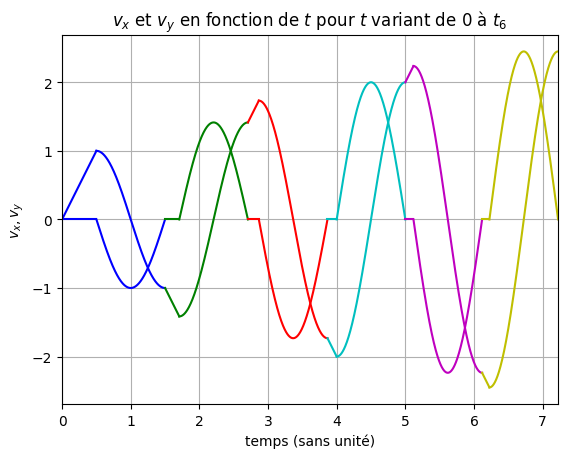

In [76]:
# 6 

for n in range(6):
    couleur = ['b', 'g', 'r', 'c', 'm', 'y']
    eps = (-1)**n
    temps1 =  np.linspace(np_t[n], np_t[n+1]-1, 1000)
    v1_x = 0 * temps1
    v1_y = eps * ( np.sqrt(n) + (temps1 -  np_t[n]) / 0.5 ) 
    plt.plot(temps1, v1_x, color = couleur[n])
    plt.plot(temps1, v1_y, color = couleur[n])
    temps2 = np.linspace(np_t[n+1]-1, np_t[n+1], 1000)
    v2_x = eps * np.sqrt(n + 1) * np.sin(np.pi * (temps2 - np_t[n+1]))
    v2_y = -eps * np.sqrt(n + 1) * np.cos(np.pi * (temps2 - np_t[n+1]))
    plt.plot(temps2, v2_x, color = couleur[n])
    plt.plot(temps2, v2_y, color = couleur[n])
plt.xlim(0, np_t[6])
plt.xlabel("temps (sans unité)")
plt.ylabel("$v_x, v_y$")
plt.title("$v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$")
plt.grid()


On remarque que les vitesses $v_x$ et $v_y$ augmentent au fur et à mesure du temps.

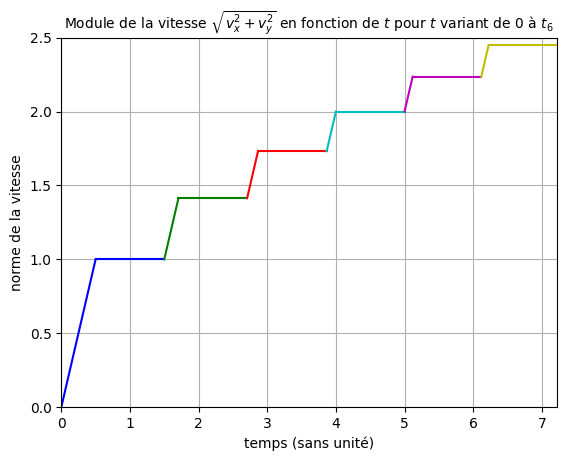

In [78]:
# 7

for n in range():
    couleur = ['b', 'g', 'r', 'c', 'm', 'y']
    eps = (-1)**n
    temps1 =  np.linspace(np_t[n], np_t[n+1]-1, 1000)
    v1_x = 0 * temps1
    v1_y = eps * ( np.sqrt(n) + (temps1 -  np_t[n]) / 0.5 ) 
    v1 = np.sqrt(v1_x**2 + v1_y **2)
    plt.plot(temps1, v1, color = couleur[n])
    temps2 = np.linspace(np_t[n+1]-1, np_t[n+1], 1000)
    v2_x = eps * np.sqrt(n + 1) * np.sin(np.pi * (temps2 - np_t[n+1]))
    v2_y = -eps * np.sqrt(n + 1) * np.cos(np.pi * (temps2 - np_t[n+1]))
    v2 = np.sqrt(v2_x**2 + v2_y **2)
    plt.plot(temps2, v2,  color = couleur[n])
plt.xlim(0, np_t[6])
plt.ylim(0, 2.5)
plt.xlabel("temps (sans unité)")
plt.ylabel("norme de la vitesse")
plt.title("Module de la vitesse $\sqrt{v_x^2+v_y^2}$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$", fontsize = 10)
plt.grid()

On observe que le module de la vitesse augmente au cours du temps. Un cyclotron sert donc à augmenter la vitesse du proton qui y est injecté.